In [1]:
import os
import numpy as np
import cv2
import pickle
import matplotlib.pyplot as plt
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator

# Dataset Creation

In [2]:
width = 128
heigth = 128
image_size = (128,128)
print(type(image_size))

<class 'tuple'>


In [3]:
root_dir = "PlantVillage/"

In [4]:
def process_image(image_path , size):
    image = cv2.imread(image_path)
    if image is None:
        return np.array([])
    else:
        image = cv2.resize(image, size)
        image = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)
        return image

In [5]:
def augment_data(image_data , label_data , count , path , label,size):
    factor = int(1000/count)
    plant_dis_folder = os.listdir(path)
    
    for image in plant_dis_folder:
        
        if image.endswith('.jpg')== True or image.endswith('.JPG')== True :
           #load image in RGB format
            img = load_img(f"{path}/{image}")   
            data = img_to_array(img)
         
            #flattening along x-Axis
            samples = expand_dims(data,0)
            datagen = ImageDataGenerator(width_shift_range=0.2 , height_shift_range=0.2 , rotation_range=40 , shear_range=0.2 ,zoom_range=0.3,horizontal_flip=True , vertical_flip=True )
            it = datagen.flow(samples, batch_size=1)
            for i in range(factor):
                batch = it.next()
                aug_img = batch[0].astype('uint8')
                aug_img = cv2.resize(aug_img, size)
                image_data.append(aug_img)
                
                label_data.append(label)
            
    return image_data , label_data



In [6]:
def create_dataset(size , root_path):
    image_data = []
    label_data = []
    
    print("Loading Images ....... ")
    
    root_dir = os.listdir(root_path)
    
    for label in root_dir:
        print("Working on ",label," .....")
        
        plant_dis_folder = os.listdir(f"{root_path}/{label}")
        image_count = 0
        for image in plant_dis_folder:
            
            image_path = f"{root_path}/{label}/{image}"
            
            if image.endswith('.jpg')== True or image.endswith('.JPG')== True :
                image_data.append(process_image(image_path , size))
                label_data.append(label)
                image_count+=1
                
        if image_count<500 and image_count>0:
            path = f"{root_path}/{label}"
            image_data , label_data  = augment_data(image_data , label_data , image_count , path , label , size) 
                
    print("Process Ends")
        
    return (image_data,label_data)


In [7]:
images , labels = create_dataset(image_size , root_dir)

Loading Images ....... 
Working on  Pepper__bell___Bacterial_spot  .....
Working on  Pepper__bell___healthy  .....
Working on  Potato___Early_blight  .....
Working on  Potato___healthy  .....
Working on  Potato___Late_blight  .....
Working on  Tomato_Bacterial_spot  .....
Working on  Tomato_Early_blight  .....
Working on  Tomato_healthy  .....
Working on  Tomato_Late_blight  .....
Working on  Tomato_Leaf_Mold  .....
Working on  Tomato_Septoria_leaf_spot  .....
Working on  Tomato_Spider_mites_Two_spotted_spider_mite  .....
Working on  Tomato__Target_Spot  .....
Working on  Tomato__Tomato_mosaic_virus  .....
Working on  Tomato__Tomato_YellowLeaf__Curl_Virus  .....
Process Ends


In [8]:
len(images) , len(labels)

(22294, 22294)

In [9]:
np.shape(images)

(22294, 128, 128, 3)

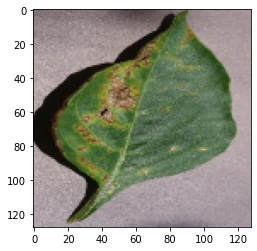

(128, 128, 3)
Pepper__bell___Bacterial_spot


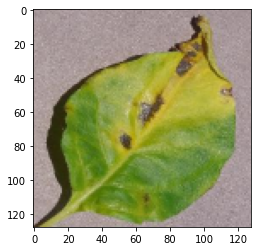

(128, 128, 3)
Pepper__bell___Bacterial_spot


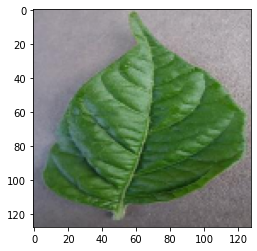

(128, 128, 3)
Pepper__bell___healthy


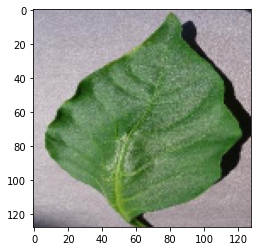

(128, 128, 3)
Pepper__bell___healthy


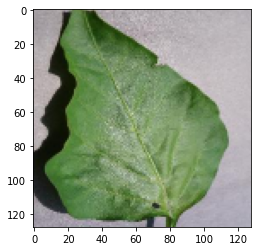

(128, 128, 3)
Pepper__bell___healthy


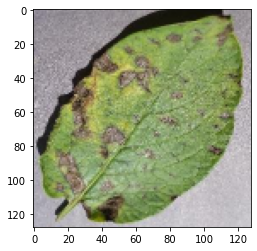

(128, 128, 3)
Potato___Early_blight


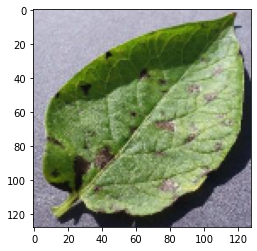

(128, 128, 3)
Potato___Early_blight


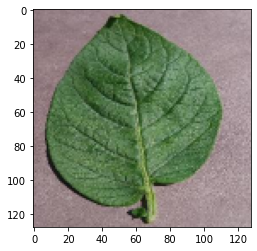

(128, 128, 3)
Potato___healthy


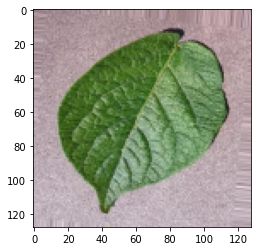

(128, 128, 3)
Potato___healthy


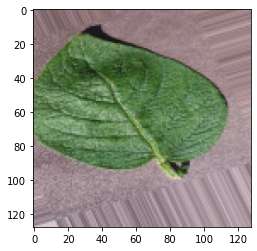

(128, 128, 3)
Potato___healthy


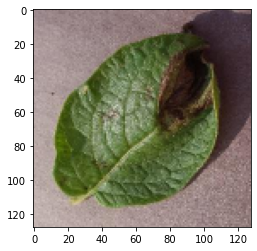

(128, 128, 3)
Potato___Late_blight


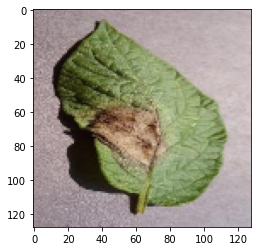

(128, 128, 3)
Potato___Late_blight


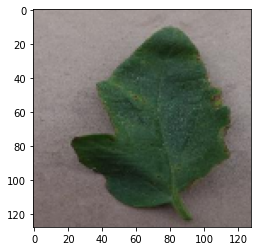

(128, 128, 3)
Tomato_Bacterial_spot


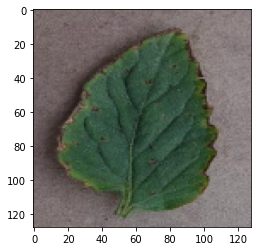

(128, 128, 3)
Tomato_Bacterial_spot


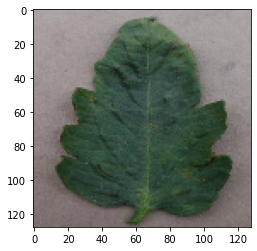

(128, 128, 3)
Tomato_Bacterial_spot


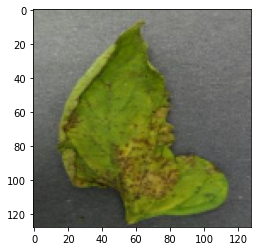

(128, 128, 3)
Tomato_Bacterial_spot


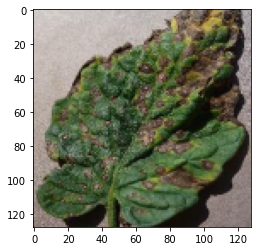

(128, 128, 3)
Tomato_Early_blight


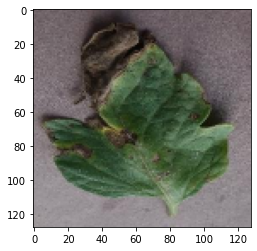

(128, 128, 3)
Tomato_Early_blight


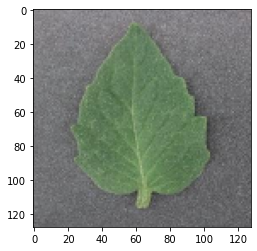

(128, 128, 3)
Tomato_healthy


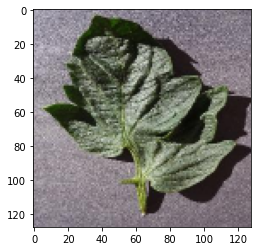

(128, 128, 3)
Tomato_healthy


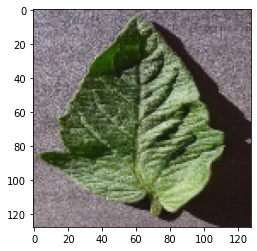

(128, 128, 3)
Tomato_healthy


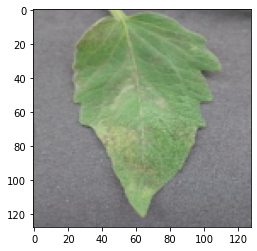

(128, 128, 3)
Tomato_Late_blight


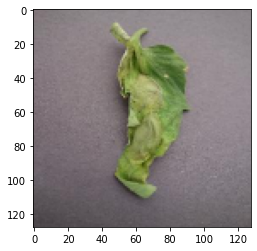

(128, 128, 3)
Tomato_Late_blight


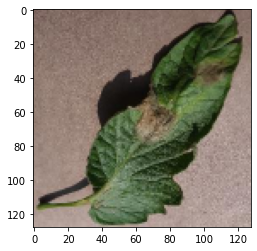

(128, 128, 3)
Tomato_Late_blight


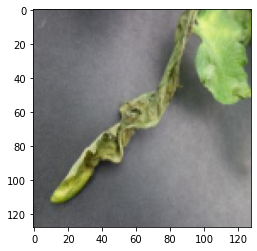

(128, 128, 3)
Tomato_Late_blight


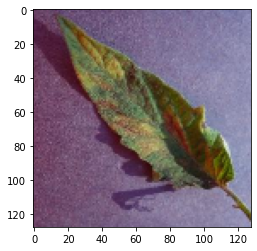

(128, 128, 3)
Tomato_Leaf_Mold


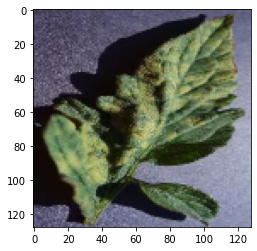

(128, 128, 3)
Tomato_Leaf_Mold


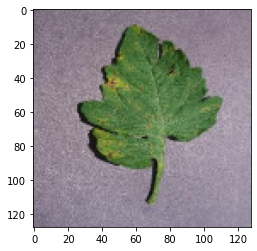

(128, 128, 3)
Tomato_Septoria_leaf_spot


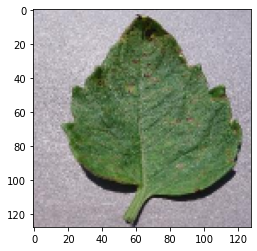

(128, 128, 3)
Tomato_Septoria_leaf_spot


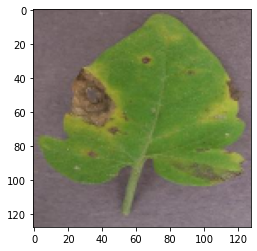

(128, 128, 3)
Tomato_Septoria_leaf_spot


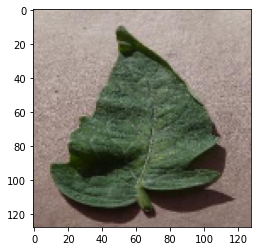

(128, 128, 3)
Tomato_Spider_mites_Two_spotted_spider_mite


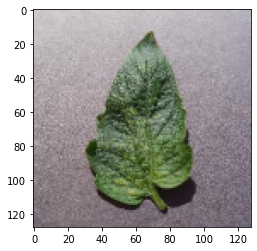

(128, 128, 3)
Tomato_Spider_mites_Two_spotted_spider_mite


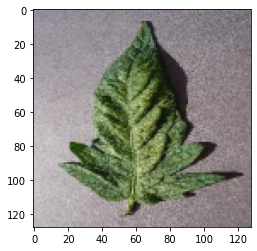

(128, 128, 3)
Tomato_Spider_mites_Two_spotted_spider_mite


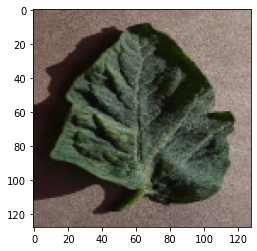

(128, 128, 3)
Tomato_Spider_mites_Two_spotted_spider_mite


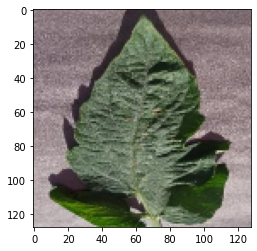

(128, 128, 3)
Tomato__Target_Spot


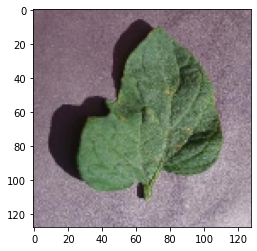

(128, 128, 3)
Tomato__Target_Spot


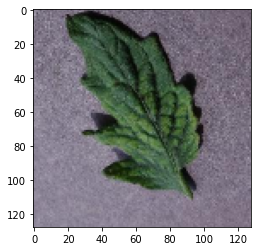

(128, 128, 3)
Tomato__Tomato_mosaic_virus


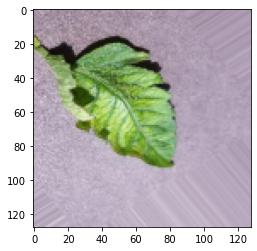

(128, 128, 3)
Tomato__Tomato_mosaic_virus


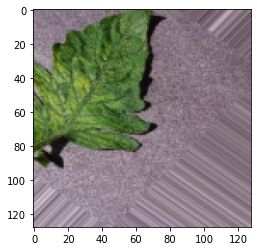

(128, 128, 3)
Tomato__Tomato_mosaic_virus


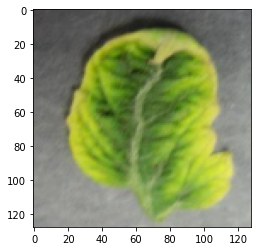

(128, 128, 3)
Tomato__Tomato_YellowLeaf__Curl_Virus


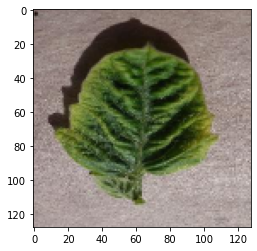

(128, 128, 3)
Tomato__Tomato_YellowLeaf__Curl_Virus


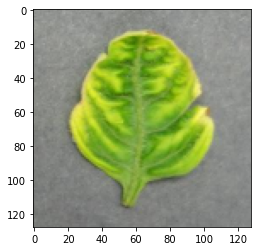

(128, 128, 3)
Tomato__Tomato_YellowLeaf__Curl_Virus


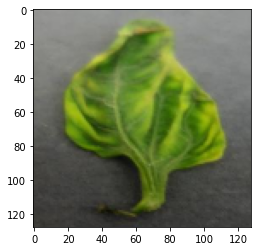

(128, 128, 3)
Tomato__Tomato_YellowLeaf__Curl_Virus


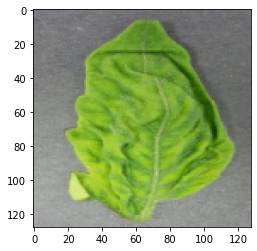

(128, 128, 3)
Tomato__Tomato_YellowLeaf__Curl_Virus


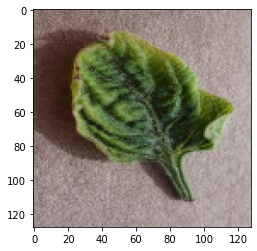

(128, 128, 3)
Tomato__Tomato_YellowLeaf__Curl_Virus


In [10]:
for image , label in zip(images[::500] , labels[::500]):
    plt.imshow(image)
    plt.show()
    print(image.shape)
    print(label)
    

In [11]:
#labels

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
encoder = LabelEncoder()
classes = encoder.fit_transform(labels)

In [14]:
encoder.classes_

array(['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy',
       'Potato___Early_blight', 'Potato___Late_blight',
       'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight',
       'Tomato_Late_blight', 'Tomato_Leaf_Mold',
       'Tomato_Septoria_leaf_spot',
       'Tomato_Spider_mites_Two_spotted_spider_mite',
       'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus',
       'Tomato__Tomato_mosaic_virus', 'Tomato_healthy'], dtype='<U43')

In [15]:
len(classes)

22294

In [16]:
klass , count = np.unique(classes,return_counts=True)

In [17]:
klass

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
      dtype=int64)

In [18]:
count

array([ 997, 1477, 1000, 1000, 1064, 2127, 1000, 1908,  952, 1771, 1676,
       1404, 3208, 1119, 1591], dtype=int64)

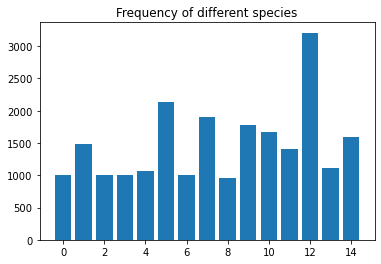

<Figure size 1008x1008 with 0 Axes>

In [19]:
# Plot a histogram
plt.bar(klass , count)
plt.title('Frequency of different species')
plt.figure(figsize=(14,14))
plt.show()

In [20]:
np.shape(images)

(22294, 128, 128, 3)

In [21]:
import random

In [22]:
dataset = list(zip(images, labels , classes)) 

In [23]:
random.shuffle(dataset)

In [24]:
images , labels, classes = zip(*dataset) 

In [25]:
dataset = np.array(dataset)

In [26]:
import pandas as pd

In [27]:
df = pd.DataFrame(dataset, columns=['Image_Vector' , 'Disease_Name' , 'Disease_ID'])

In [28]:
df.head(20)

Image_Vector  \
0   [[[153, 141, 143], [163, 151, 153], [163, 151,...   
1   [[[146, 127, 120], [131, 112, 105], [146, 127,...   
2   [[[120, 116, 130], [122, 118, 132], [121, 117,...   
3   [[[135, 128, 144], [130, 123, 139], [124, 117,...   
4   [[[149, 133, 133], [155, 139, 139], [166, 150,...   
5   [[[118, 114, 113], [117, 113, 112], [121, 117,...   
6   [[[131, 126, 130], [124, 119, 123], [135, 130,...   
7   [[[130, 119, 123], [123, 112, 116], [115, 104,...   
8   [[[156, 139, 145], [158, 141, 147], [165, 148,...   
9   [[[141, 143, 142], [141, 143, 142], [141, 143,...   
10  [[[137, 123, 146], [150, 136, 159], [152, 140,...   
11  [[[170, 153, 161], [158, 141, 149], [152, 135,...   
12  [[[95, 129, 89], [93, 129, 102], [81, 119, 87]...   
13  [[[147, 140, 147], [144, 137, 144], [142, 135,...   
14  [[[126, 113, 122], [117, 104, 113], [110, 97, ...   
15  [[[117, 104, 111], [108, 95, 102], [126, 113, ...   
16  [[[157, 154, 161], [158, 155, 162], [162, 159,...   
17  [[[145, 144, 150], [144, 143, 149], [163, 162,...   
18  [[[113, 100, 117], [111, 98, 115], [116, 103, ...   
19  [[[166, 163, 174], [153, 150, 161], [176, 173,...   

                                   Disease_Name Disease_ID  
0                        Pepper__bell___healthy          1  
1   Tomato_Spider_mites_Two_spotted_spider_mite         10  
2                            Tomato_Late_blight          7  
3   Tomato_Spider_mites_Two_spotted_spider_mite         10  
4                         Tomato_Bacterial_spot          5  
5                         Tomato_Bacterial_spot          5  
6                                Tomato_healthy         14  
7                            Tomato_Late_blight          7  
8                        Pepper__bell___healthy          1  
9         Tomato__Tomato_YellowLeaf__Curl_Virus         12  
10                Pepper__bell___Bacterial_spot          0  
11                             Potato___healthy          4  
12                             Potato___healthy          4  
13        Tomato__Tomato_YellowLeaf__Curl_Virus         12  
14  Tomato_Spider_mites_Two_spotted_spider_mite         10  
15                          Tomato__Target_Spot         11  
16                        Potato___Early_blight          2  
17                               Tomato_healthy         14  
18                    Tomato_Septoria_leaf_spot          9  
19                    Tomato_Septoria_leaf_spot          9

In [29]:
x = np.array(images)

In [30]:
y = np.array(classes)

In [31]:
print(x.shape , y.shape)

(22294, 128, 128, 3) (22294,)


In [32]:
split = int(0.8*x.shape[0])


x_train = x[:split]
x_test = x[split:]

y_train = y[:split]
y_test = y[split:]

In [33]:
print(x_train.shape , y_train.shape , x_test.shape , y_test.shape)

(17835, 128, 128, 3) (17835,) (4459, 128, 128, 3) (4459,)


In [34]:
from keras.utils import to_categorical

In [35]:
#Converting to One_Hot_Vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_train.shape)
print(y_test.shape)

(17835, 15)
(4459, 15)


In [38]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
np.save(("x_train"),x_train)
np.save(("x_test"),x_test)
np.save(("y_train"),y_train)
np.save(("y_test"),y_test)